In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter

In [2]:
mp_key = "x6hAWrx1l7nO3pcKMHzrj9I3u9zQTpCo"
mp_id = "mp-924130"

In [7]:
mp = MPRester(mp_key)
# récupère les données sur la structure de bande
band_structure = mp.get_bandstructure_by_material_id(mp_id)  # données avec la structure de bande
BSPlot = BSPlotter(band_structure)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

 # Bande interdite

In [22]:
# récupère les données sur le bandgap
band_gap = band_structure.get_band_gap()
print(f"Le band gap est-il direct ? {band_gap['direct']} => Il faut une assistance phononique !\nSon énergie est de {round(band_gap['energy'], 5)} eV, le TiNiSn est donc un semiconducteur !")

Le band gap est-il direct ? False => Il faut une assistance phononique !
Son énergie est de 0.4527 eV, le TiNiSn est donc un semiconducteur !


# Direction et dispersion

<Axes: xlabel='$\\mathrm{Wave\\ Vector}$', ylabel='$\\mathrm{E\\ -\\ E_f\\ (eV)}$'>

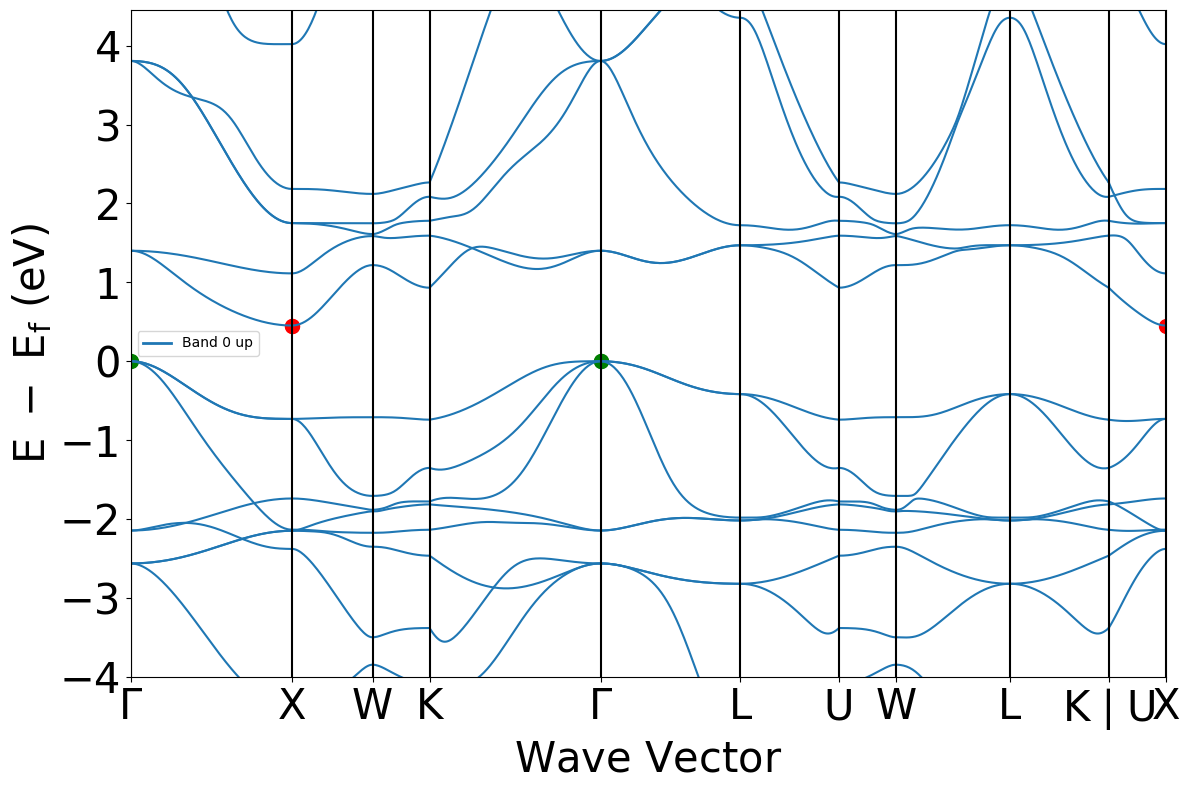

In [37]:
# Plot pour avoir une idée visuelle des bandes
BSPlot.get_plot(vbm_cbm_marker=True)

In [58]:
# Détermine quelles bandes il faut analyser
vbm = band_structure.get_vbm() #récupération des bandes de conduction maximales
cbm = band_structure.get_cbm() #récupération des bandes de valence maximales

print(f"Maximum de la bande de valence (valence band maximum) : {vbm['band_index']}. Indice de la dernière bande de valence : 19\nEnergie : {vbm.get('energy')}")
print(f"Minimum de la bande de conduction (conduction band minimum) : {cbm['band_index']}. Indice de la première bande de conduction : 20\nEnergie : {cbm.get('energy')}")
print(f"Différence d'énergie : {round(cbm.get('energy') - vbm.get('energy'), 5)} eV comme précédemment.")

Maximum de la bande de valence (valence band maximum) : defaultdict(<class 'list'>, {<Spin.up: 1>: [17, 18, 19]}). Indice de la dernière bande de valence : 19
Energie : 7.589
Minimum de la bande de conduction (conduction band minimum) : defaultdict(<class 'list'>, {<Spin.up: 1>: [20]}). Indice de la première bande de conduction : 20
Energie : 8.0417
Différence d'énergie : 0.4527 eV comme précédemment.


In [127]:
# Détermine les direction présentant le plus et le moins de dispersion
# La dispersion est par définition la pente du graphe de la fct E(k)
# Il va falloir calculer la pente pour chaque zone jusqu'à trouver un minima et un maxima

# fonction calcul de pente, renvoie array à  5 dimensions
def dEdK(E,k):
    dEdK = (abs((E[-1]-E[0])))/(k[-1]-k[0])
    result = [E[-1],E[0],k[-1],k[0],dEdK]
    return(np.array(result))

# récupère les données nécessaires
data = BSPlot.bs_plot_data()
distance = data.get('ticks').get('distance')
distances = data.get('distances') # récupération des directions que peuvent prendre k
energy = data.get('energy') # énergie associée aux différentes directions

# crée des arrays qui stockent les 5 valeurs pour chaque segment
pente_val = np.zeros((len(distances),5))
pente_cond = np.zeros((len(distances),5))
for i in range(len(distances)): # calcul des pentes associées aux différents vecteurs k
    pente_val[i] = dEdK(energy["1"][i][19],distances[i])  # 19 est l'indice de la dernière bande de valence
    pente_cond[i] = dEdK(energy["1"][i][20],distances[i])  # 20 est l'indice de la première bande de conduction

# crée des arrays qui stockent juste la valeur de la pente
finder_for_val = np.zeros(len(distances)) 
finder_for_cond = np.zeros(len(distances))

# détermination de la pente la plus élevée (4ème élément de l'array)
for j in range(len(distances)):
    finder_for_val[j] = pente_val[j][4]
    finder_for_cond[j] = pente_cond[j][4]

# récupère l'indice voulu
max_val = np.argmax(finder_for_val)
min_val = np.argmin(finder_for_val)
max_cond = np.argmax(finder_for_cond)
min_cond = np.argmin(finder_for_cond)
print(f"max_val : {max_val}, min_val : {min_val}, max_cond : {max_cond}, min_cond : {min_cond}")

max_val : 0, min_val : 9, max_cond : 1, min_cond : 4


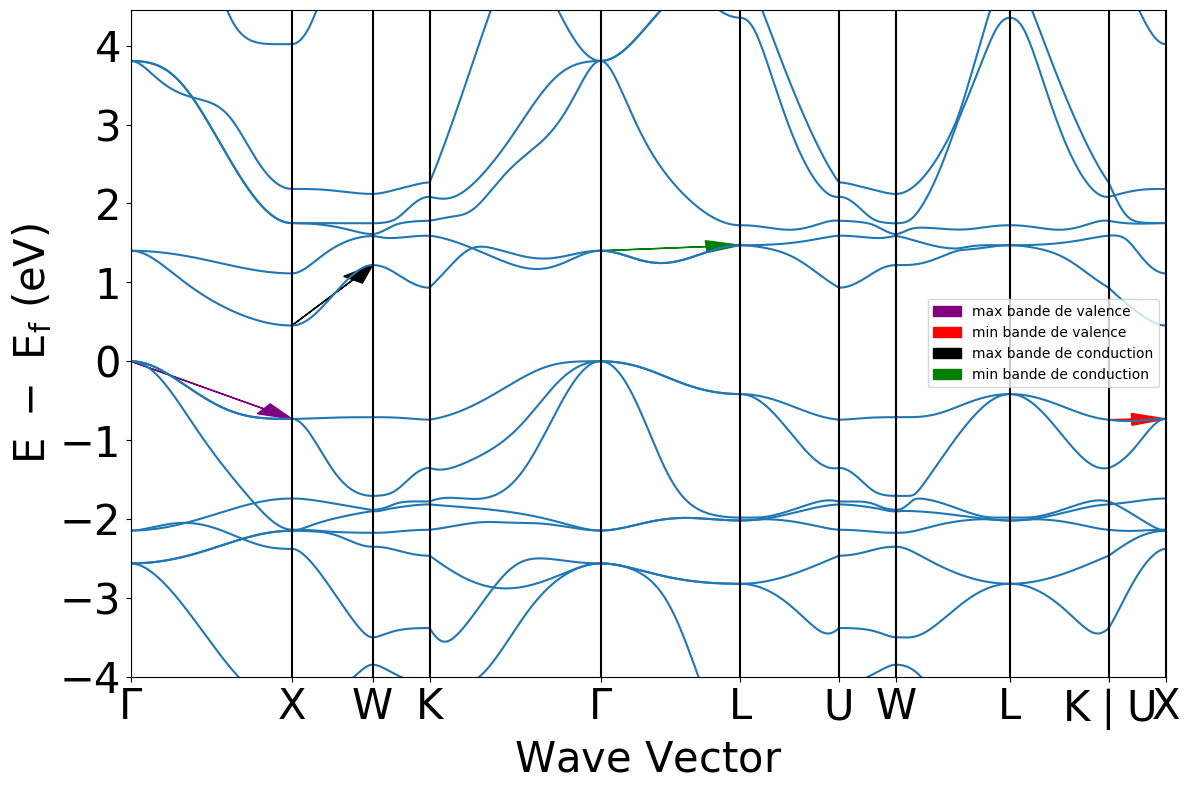

In [91]:
# Figure indiquant les dispersions minimales et maximales par des flèches
BSPlot.get_plot()
# Les arrays dont on a besoin pour nos 4 flèches
pente_val_max = pente_val[max_val]
pente_val_min = pente_val[min_val]
pente_cond_max = pente_cond[max_cond]
pente_cond_min = pente_cond[min_cond]

# maximum dans la bande de valence en mauve
plt.arrow(pente_val_max[3],pente_val_max[1],pente_val_max[2]-pente_val_max[3],pente_val_max[0]-pente_val_max[1], color='purple', head_width = 0.15, length_includes_head=True, label="max bande de valence")
# minimum dans la bande de valence en rouge
plt.arrow(pente_val_min[3],pente_val_min[1],pente_val_min[2]-pente_val_min[3],pente_val_min[0]-pente_val_min[1], color='red', head_width = 0.15, length_includes_head =True, label="min bande de valence")
# maximum dans la bande de condution en noir
plt.arrow(pente_cond_max[3],pente_cond_max[1],pente_cond_max[2]-pente_cond_max[3],pente_cond_max[0]-pente_cond_max[1], color='black', head_width = 0.15, length_includes_head =True, label="max bande de conduction")
# minimum dans la bande de conduction en vert
plt.arrow(pente_cond_min[3],pente_cond_min[1],pente_cond_min[2]-pente_cond_min[3],pente_cond_min[0]-pente_cond_min[1], color='green', head_width = 0.15, length_includes_head = True, label="min bande de conduction")
plt.legend()


# Masse effective

La masse effective au sommet de la bande de valence est -3.0565841978525975e-28 [kg].
La masse effective au plancher de la bande de conduction est 2.131793559890003e-30 [kg]


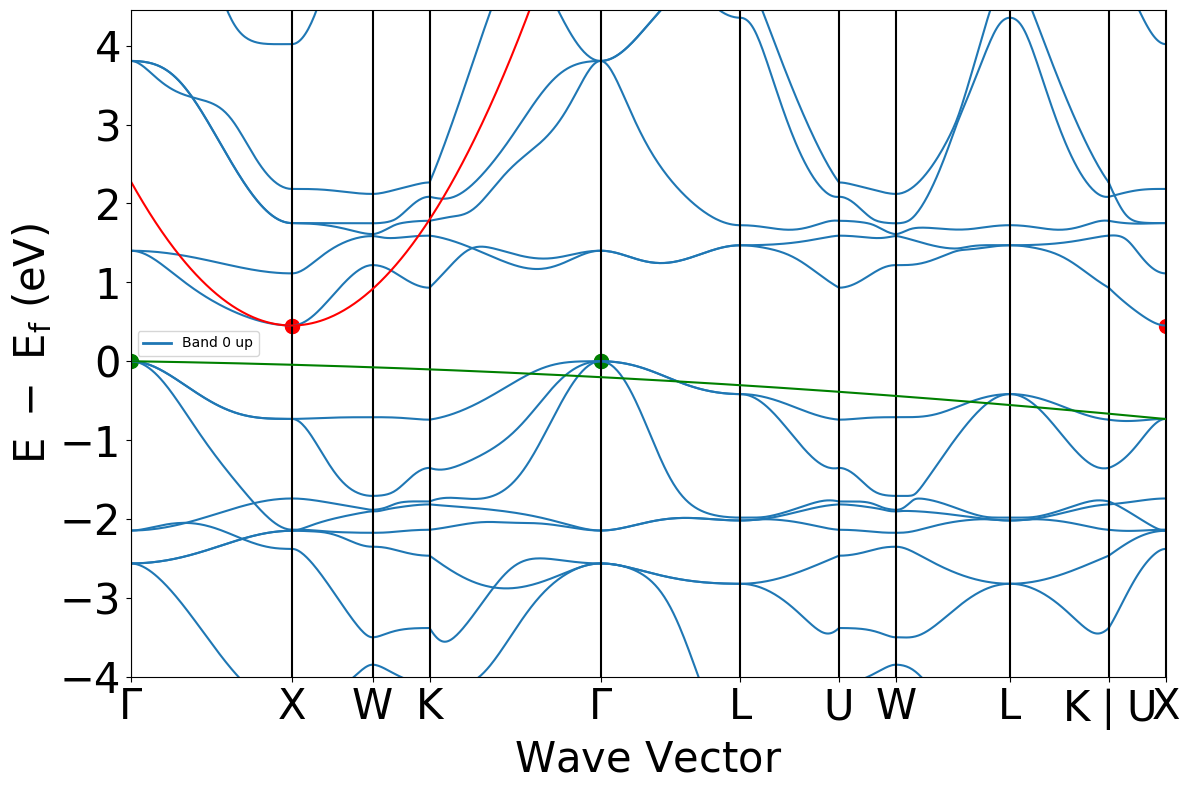

In [148]:
# La masse effective est donnée par la formule : m_eff = h_bar**2 * (d**2E / dk**2)**(-1)
# Ici, on va supposer que la dispersion est parabolique, donc E = a * k**2 + b * k + c
# En utilisant la formule de la masse effective comme condition, on trouve le coefficient a = h_bar**2 / (2 * m_eff)
# On va calculer les coefficients avec polyfit et, avec a calculé, calculer m_eff
# Il ne faut donc 3 points (k, E) pour chaque courbe

# Constantes
hbar = (6.62607015*10**(-34))/(2*np.pi) # [J]
ev = 1.602176634*10**(-19) # [J]
angstrom = 10**(-10) # [m]

# Masse effective au sommet de la bande de valence
vbm = data.get('vbm')
# -1 et 0 car un maxima en dernière et première zone
kval = np.zeros(3)
kval[0] = distances[-1][-2]  
kval[1] = vbm[0][0]
kval[2] = distances[0][1]

e_val = np.zeros(3)
e_val[0] = energy.get('1')[-1][19][-2]  # 19 car c'est la 19ème bande
e_val[1] = vbm[0][1]
e_val[2] = energy.get('1')[0][19][1]

# Interpole pour bande de valence
params_val = np.polyfit(kval, e_val, 2)
m_eff_val = (hbar)**2 / (2 * params_val[0] * ev * (angstrom)**2)  # calcul de la masse effective avec ajustement des unités
print(f"La masse effective au sommet de la bande de valence est {m_eff_val} [kg].")

# Masse effective au plancher de la bande de conduction
cbm = data.get('cbm')
# 0 et 2 car un minima entre première et deuxième zone
kcond = np.zeros(3)
kcond[0] = distances[0][-2]
kcond[1] = cbm[0][0]
kcond[2] = distances[2][1]

e_cond = np.zeros(3)
e_cond[0] = energy.get('1')[0][20][-2]  # 20 car c'est la 20ème bande
e_cond[1] = cbm[0][1]
e_cond[2] = energy.get('1')[2][20][-2]

# Interpole pour bande de valence
params_cond = np.polyfit(kcond, e_cond, 2)
m_eff_cond = (hbar)**2 / (2 * params_cond[0] * ev * (angstrom)**2)  # calcul de la masse effective avec ajustement des unités
print(f"La masse effective au plancher de la bande de conduction est {m_eff_cond} [kg]")

# plot
BSPlot.get_plot(vbm_cbm_marker=True)

k = np.linspace(distances[0][0],distances[9][-1],1000)
plt.plot(k, np.polyval(params_val, k), 'g')

plt.plot(k, np.polyval(params_cond, k), 'r')
